Name: Omkar Thorve
PRN: 24070149016

# From Scratch

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def harris_corner_detection(image_path, k=0.04, threshold=0.02, window_size=7, sigma=2.0):
    # Step 1: Load the image and convert to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)  # Convert to float for precision

    # Step 2: Compute gradients using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Larger kernel size for smoother edges
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Step 3: Compute products of derivatives
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Step 4: Apply Gaussian filter to smooth the squared gradients
    Ixx = cv2.GaussianBlur(Ixx, (window_size, window_size), sigmaX=sigma)
    Iyy = cv2.GaussianBlur(Iyy, (window_size, window_size), sigmaX=sigma)
    Ixy = cv2.GaussianBlur(Ixy, (window_size, window_size), sigmaX=sigma)

    # Step 5: Compute Harris Response Matrix R = det(M) - k * (trace(M))^2
    detM = (Ixx * Iyy) - (Ixy * Ixy)
    traceM = Ixx + Iyy
    R = detM - k * (traceM ** 2)

    # Step 6: Normalize response and apply adaptive thresholding
    R_norm = cv2.normalize(R, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    R_norm = np.uint8(R_norm)

    # Step 7: Detect strong corners using a more adaptive threshold
    corners = R > (threshold * np.max(R))
    img_with_corners = img.copy()

    # Step 8: Draw circles on detected corners
    for y, x in np.argwhere(corners):
        cv2.circle(img_with_corners, (x, y), 4, (0, 255, 0), -1)  # Larger circle for visibility

    # Step 9: Display the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Corners")
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

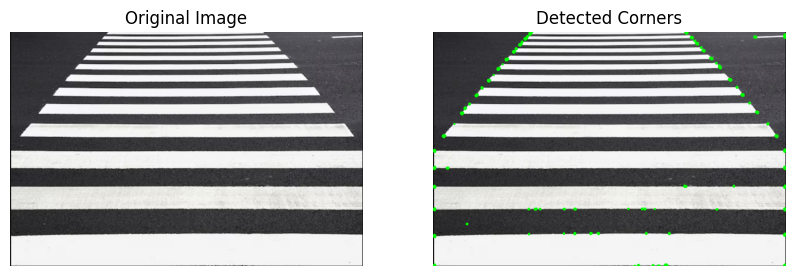

In [50]:
# Example Usage
harris_corner_detection('/content/Screenshot 2025-02-26 at 12.05.43 AM.png')

# Using Corner Harris Function

In [51]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [52]:


def harris_corner_detection(image_path, threshold=0.01):
    # Read image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to float32 for Harris detection
    gray = np.float32(gray)

    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)  # Dilate to enhance corner points

    # Mark corners in red
    image[dst > threshold * dst.max()] = [0, 0, 255]

    # Display result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

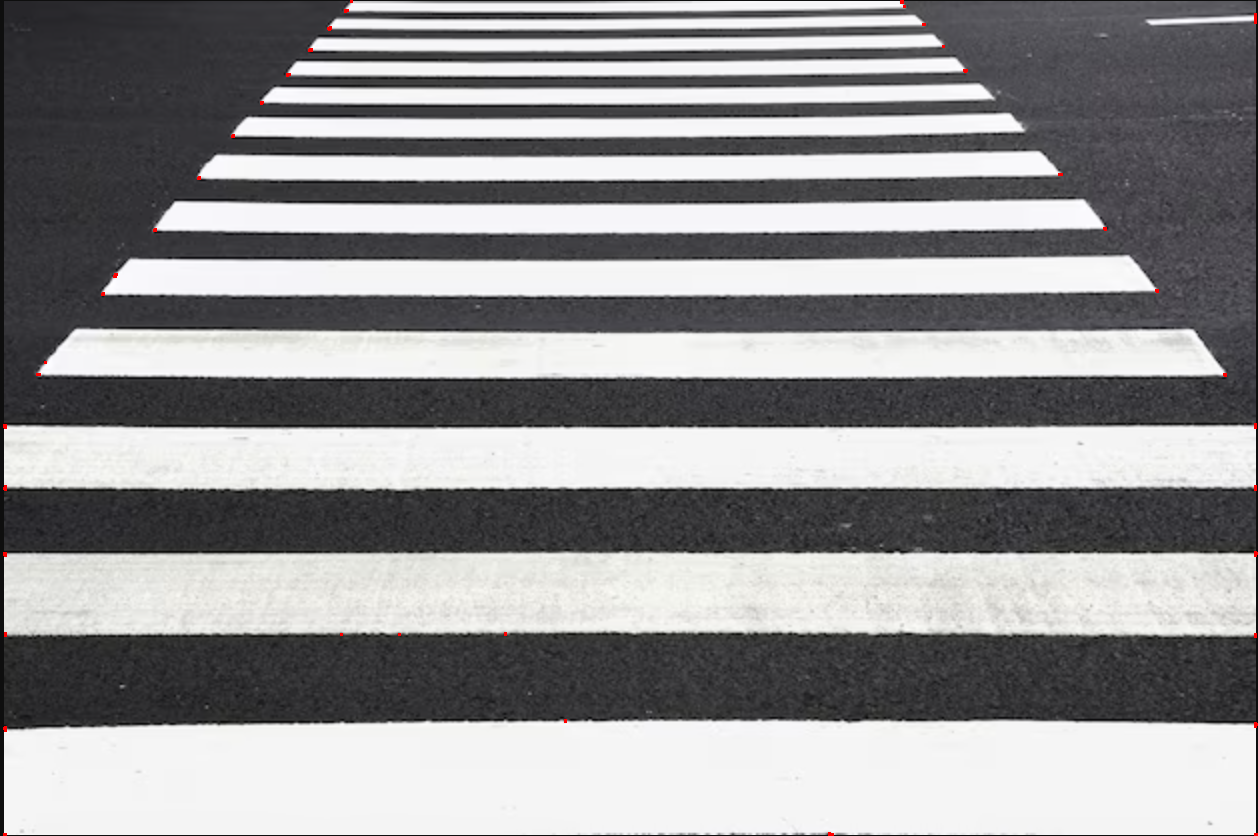

In [53]:
# Example usage
harris_corner_detection('/content/Screenshot 2025-02-26 at 12.05.43 AM.png')